# HH здесь необходимые данные для дальнейшей отладки (подготовки начального состояния)


In [1]:
from qiskit_nature.units import DistanceUnit
from Ternary_Tree import InitstateTTInfo, ternary_tree
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Pauli
from qiskit.opflow import PauliTrotterEvolution, PauliOp
from numpy import pi
# def initial_state_H2(bond_length):
at_name ="H"
bond_length = 1
driver = PySCFDriver(
    atom="H 0 0 0;" + at_name + " 0 0 " + str(bond_length),
    basis="sto3g",
#         basis="6-31G",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
es_problem = driver.run()
nmodes = es_problem.num_spin_orbitals
num_alpha = es_problem.num_alpha
num_beta = es_problem.num_alpha
if num_alpha != num_beta:
    print("Все плохо")

num_list = None
qc = QuantumCircuit(4)
qc.x(0)
qc.x(3)
qc.x(1)
qc = qc.compose(PauliTrotterEvolution().evolution_for_pauli(PauliOp(Pauli('IXXI'), pi/2)).to_circuit())
qc = qc.compose(PauliTrotterEvolution().evolution_for_pauli(PauliOp(Pauli('XZZZ'), pi/2)).to_circuit())
qc = qc.compose(PauliTrotterEvolution().evolution_for_pauli(PauliOp(Pauli('XZIZ'), pi/2)).to_circuit())
qc = qc.compose(PauliTrotterEvolution().evolution_for_pauli(PauliOp(Pauli('YIIZ'), pi/2)).to_circuit())


display("inititial state prapration")
print(qc)
from qiskit.primitives import Estimator
from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCC,UCCSD
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter, BravyiKitaevMapper
from Ternary_Tree import TernaryTreeMapper
mapper = BravyiKitaevMapper()
mapper = JordanWignerMapper()
converter = QubitConverter(mapper)
        
u = UCC(qubit_converter = converter,  num_spatial_orbitals = 2, num_particles = (1,1) ,excitations = 'sd')
print(u.decompose().decompose().decompose().depth())


'inititial state prapration'

     ┌───┐┌───┐┌───┐                   ┌───┐┌───┐┌───┐┌───┐┌───────┐┌───┐┌───┐»
q_0: ┤ X ├┤ I ├┤ I ├───────────────────┤ X ├┤ X ├┤ X ├┤ I ├┤ Rz(π) ├┤ I ├┤ X ├»
     ├───┤├───┤├───┤┌───────┐┌───┐┌───┐└─┬─┘└─┬─┘└─┬─┘└───┘└───────┘└───┘└─┬─┘»
q_1: ┤ X ├┤ H ├┤ X ├┤ Rz(π) ├┤ X ├┤ H ├──■────┼────┼───────────────────────┼──»
     ├───┤└───┘└─┬─┘└───────┘└─┬─┘├───┤       │    │                       │  »
q_2: ┤ H ├───────■─────────────■──┤ H ├───────■────┼───────────────────────┼──»
     ├───┤┌───┐                   └───┘            │                       │  »
q_3: ┤ X ├┤ H ├────────────────────────────────────■───────────────────────■──»
     └───┘└───┘                                                               »
«     ┌───┐┌───┐┌───┐┌───┐┌───┐┌───────┐┌───┐┌───┐┌───┐            ┌───┐┌───┐»
«q_0: ┤ X ├┤ X ├┤ X ├┤ X ├┤ I ├┤ Rz(π) ├┤ I ├┤ X ├┤ X ├────────────┤ X ├┤ I ├»
«     └─┬─┘└─┬─┘└─┬─┘└─┬─┘└───┘└───────┘└───┘└─┬─┘└─┬─┘            └─┬─┘└───┘»
«q_1: ──┼────■────┼────┼───────────────────

# Здесь правильно подготовленное начальное состояние для $H_2$ с 4 кубитами (базис STO-3G)

In [7]:

from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit_nature.second_q.circuit.library import HartreeFock, UCC
from qiskit.algorithms.optimizers import L_BFGS_B, SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.algorithms import VQEUCCFactory


import Ternary_Tree
from Ternary_Tree import jwenergy, ttenergy, energy_classic
import numpy as np
N = 20
K = 20
k=0
GE = [[] for _ in range(K)]
for k in range(K):
    GE[k] = [[] for _ in range(N)] 
GE4 = [0]*N
GE6 = [0]*N
GE8 = [0]*N
IE = [0]*N
# JWE = [0]*N
R = np.linspace(0.4, 2.5, N)
E_CISD = [0]*N
E_HF = [0]*N  
k = -1
# for i1 in range(6):
#     for i2 in range(i1+1 ,6):
#         for i3 in range(i2+1 ,6):
#             for i4 in range(i3+1 ,6):
#                 k += 1 
for n in range(0,N):

    print(n)
#                     GE[k][n], IE[n] = ttenergy(R[n],"H", nmodes = 6,basis = "6-31G",only_hartree = True,ins = [i1,i2,i3,i4])

    GE4[n],IE[n] = ttenergy(R[n],"H", nmodes = 4,basis = "STO-3G",only_hartree = True,ins = [])

#     GE6[n],IE[n] = ttenergy(R[n],"H", nmodes = 4,basis = "6-31G",only_hartree = True)

#     GE8[n],IE[n] = ttenergy(R[n],"H", nmodes = 8,basis = "6-31G",only_hartree = True)


#     JWE[n]= jwenergy(R[n])
    E_CISD[n], E_HF[n] = energy_classic(R[n],"H")

0
None
None
0X  0X  0X  0Y  0Y  0Z  0Z  0Z  
1X  1Y  1Z  2X  2Z  3X  3Y  3Z  
1   3   4   2   6   8   7   5   
 ---------------------------------------------------------------
asdf
0X  0X  0X  0Y  0Y  0Y  0Z  0Z  
1X  1Y  1Z  2X  2Y  2Z  3X  3Y  
1   3   4   2   5   6   8   7   
 ---------------------------------------------------------------
0X  0X  0X  0Y  0Y  0Y  0Z  0Z  
1X  1Y  1Z  2X  2Y  2Z  3X  3Y  
1   2   5   3   4   6   8   7   
 ---------------------------------------------------------------
[[('XXII', 'YIXI'), ('XYII', 'XZII'), ('ZIIZ', 'YIZI'), ('ZIIY', 'ZIIX')], [[1, (-0-1j)], [1, (-0-1j)], [1, (-0-1j)], [1, (-0-1j)]]]
[[('XXII', 'YIXI'), ('XYII', 'XZII'), ('ZIIZ', 'YIZI'), ('ZIIY', 'ZIIX')], [[1, 1j], [1, (-0-1j)], [1, 1j], [1, (-0-1j)]]]
------------------------
XIYZ
[[['XXII', 'YIXI'], ['XYII', 'XZII'], ['YIYI', 'YIZI'], ['ZIIY', 'ZIIX']], [[1, 1j], [1, (-0-1j)], [(1+0j), 1j], [1, (-0-1j)]]]
ZYXI
[[['XXII', 'XYII'], ['YIXI', 'XZII'], ['YIYI', 'YIZI'], ['ZIIY', 'ZIIX']

converged SCF energy = -1.04773367124818
E(RCISD) = -1.087431189000145  E_corr = -0.03969751775196971
7
None
None
0X  0X  0X  0Y  0Y  0Z  0Z  0Z  
1X  1Y  1Z  2X  2Z  3X  3Y  3Z  
1   3   4   2   6   8   7   5   
 ---------------------------------------------------------------
asdf
0X  0X  0X  0Y  0Y  0Y  0Z  0Z  
1X  1Y  1Z  2X  2Y  2Z  3X  3Y  
1   3   4   2   5   6   8   7   
 ---------------------------------------------------------------
0X  0X  0X  0Y  0Y  0Y  0Z  0Z  
1X  1Y  1Z  2X  2Y  2Z  3X  3Y  
1   2   5   3   4   6   8   7   
 ---------------------------------------------------------------
[[('XXII', 'YIXI'), ('XYII', 'XZII'), ('ZIIZ', 'YIZI'), ('ZIIY', 'ZIIX')], [[1, (-0-1j)], [1, (-0-1j)], [1, (-0-1j)], [1, (-0-1j)]]]
[[('XXII', 'YIXI'), ('XYII', 'XZII'), ('ZIIZ', 'YIZI'), ('ZIIY', 'ZIIX')], [[1, 1j], [1, (-0-1j)], [1, 1j], [1, (-0-1j)]]]
------------------------
XIYZ
[[['XXII', 'YIXI'], ['XYII', 'XZII'], ['YIYI', 'YIZI'], ['ZIIY', 'ZIIX']], [[1, 1j], [1, (-0-1j)], [(1+

converged SCF energy = -0.819953604818438
E(RCISD) = -0.9588320728743687  E_corr = -0.1388784680559311
14
None
None
0X  0X  0X  0Y  0Y  0Z  0Z  0Z  
1X  1Y  1Z  2X  2Z  3X  3Y  3Z  
1   3   4   2   6   8   7   5   
 ---------------------------------------------------------------
asdf
0X  0X  0X  0Y  0Y  0Y  0Z  0Z  
1X  1Y  1Z  2X  2Y  2Z  3X  3Y  
1   3   4   2   5   6   8   7   
 ---------------------------------------------------------------
0X  0X  0X  0Y  0Y  0Y  0Z  0Z  
1X  1Y  1Z  2X  2Y  2Z  3X  3Y  
1   2   5   3   4   6   8   7   
 ---------------------------------------------------------------
[[('XXII', 'YIXI'), ('XYII', 'XZII'), ('ZIIZ', 'YIZI'), ('ZIIY', 'ZIIX')], [[1, (-0-1j)], [1, (-0-1j)], [1, (-0-1j)], [1, (-0-1j)]]]
[[('XXII', 'YIXI'), ('XYII', 'XZII'), ('ZIIZ', 'YIZI'), ('ZIIY', 'ZIIX')], [[1, 1j], [1, (-0-1j)], [1, 1j], [1, (-0-1j)]]]
------------------------
XIYZ
[[['XXII', 'YIXI'], ['XYII', 'XZII'], ['YIYI', 'YIZI'], ['ZIIY', 'ZIIX']], [[1, 1j], [1, (-0-1j)], [(

<IPython.core.display.Javascript object>


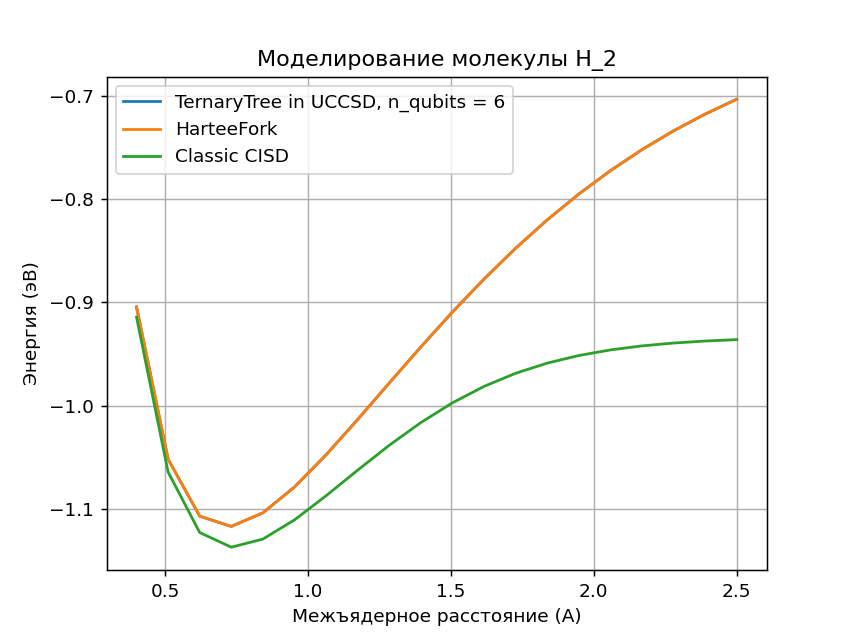

/home/fisher/anaconda3/envs/p4env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
# for i in range(K):
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
f = 20
k = 0
# ax.plot(R[k:f],GE4[k:f],label="TernaryTree in UCCSD, n_qubits = 4")
ax.set_xlabel('Межъядерное расстояние (А)')
ax.set_ylabel('Энергия (эВ)')
ax.plot(R[k:f],GE4[k:f],label="TernaryTree in UCCSD, n_qubits = 6")
# ax.plot(R[k:f],GE8[k:f],label="TernaryTree in UCCSD, n_qubits = 8")
ax.plot(R[k:f],E_HF[k:f],label="HarteeFork")
ax.grid()
# ax.plot(R[k:f],E_HF[k:f], label="Hartree Fock (classic initial energy)")
ax.plot(R[k:f],E_CISD[k:f], label="Classic CISD")
ax.legend()
ax.set_title(label = "Mоделирование молекулы H_2")
plt.savefig("figure.png")

In [3]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
from Ternary_Tree import get_depth
from qiskit_nature.second_q.drivers import PySCFDriver
at_name = 'Li'
bond_length = 1
basis = "6-31G"
driver = PySCFDriver(
    atom="H 0 0 0;" + at_name + " 0 0 " + str(bond_length),
#     basis="sto3g",
    basis=basis,
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
es_problem = driver.run()
N = [2*n for n in range(3,10)]
D = []
for nmodes in N:
    if nmodes == None:
        nmodes = es_problem.num_spin_orbitals
    print(es_problem.num_spin_orbitals)
    driver = PySCFDriver(
        atom="H 0 0 0;" + at_name + " 0 0 " + str(bond_length),
    #     basis="sto3g",
        basis=basis,
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM,
    )
    es_problem = driver.run()
    transformer = ActiveSpaceTransformer(num_electrons = es_problem.num_particles, 
                                         num_spatial_orbitals = nmodes//2)

    es_problem = transformer.transform(es_problem)
    D.append([get_depth(es_problem, 'TT'), get_depth(es_problem, 'JW'), get_depth(es_problem, 'BK')])
    


22
0X  0X  0X  0X  0X  0Y  0Y  0Y  0Z  0Z  0Z  0Z  
1X  1X  1X  1Y  1Z  2X  2Y  2Z  3X  3Y  3Z  3Z  
4X  4Y  4Z                              5X  5Y  
1   2   5   6   7   3   4   8   10  9   11  12  
 ---------------------------------------------------------------
6
0X  0X  0X  0X  0X  0X  0X  0Y  0Y  0Y  0Z  0Z  0Z  0Z  0Z  0Z  
1X  1X  1X  1Y  1Y  1Y  1Z  2X  2Y  2Z  3X  3Y  3Y  3Y  3Z  3Z  
4X  4Y  4Z  5X  5Y  5Z                      6X  6Y  6Z  7X  7Y  
1   2   5   7   8   6   9   3   4   10  12  14  13  11  16  15  
 ---------------------------------------------------------------
8
0X  0X  0X  0X  0X  0X  0X  0X  0X  0Y  0Y  0Y  0Z  0Z  0Z  0Z  0Z  0Z  0Z  0Z  
1X  1X  1X  1Y  1Y  1Y  1Z  1Z  1Z  2X  2Y  2Z  3X  3X  3X  3Y  3Y  3Y  3Z  3Z  
4X  4Y  4Z  5X  5Y  5Z  6X  6Y  6Z              7X  7Y  7Z  8X  8Y  8Z  9X  9Y  
1   2   9   7   8   10  5   6   11  3   4   12  14  13  18  20  19  17  15  16  
 ---------------------------------------------------------------
10
0X  0X  0X  0X 

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


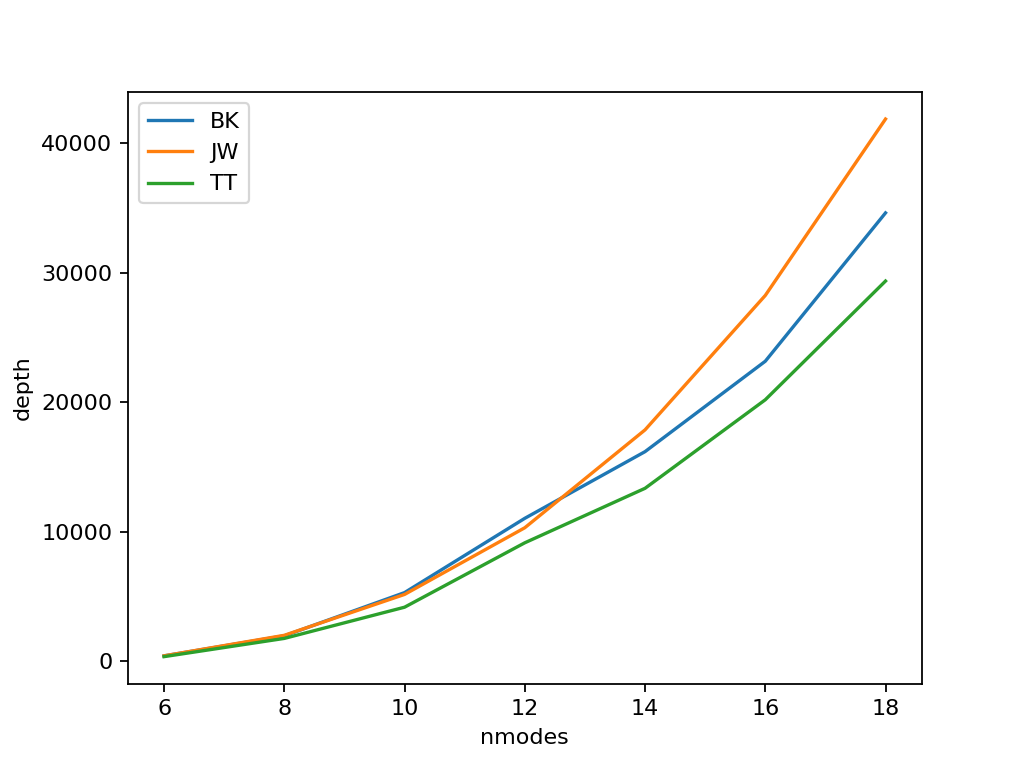

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
k= 0
f = 20
ax.plot(N[k:f],[d[2] for d in D],label="BK")
ax.set_xlabel('nmodes')
ax.set_ylabel('depth')
ax.plot(N[k:f],[d[1] for d in D],label="JW")
ax.plot(N[k:f],[d[0] for d in D],label="TT")
# ax.plot(R[k:f],E_HF[k:f],label="HarteeFork, nmodes = 8")

# ax.plot(R[k:f],E_HF[k:f], label="Hartree Fock (classic initial energy)")
# ax.plot(R[k:f],E_CISD[k:f], label="Classic CISD")
ax.legend()

In [4]:
from Ternary_Tree import ternary_tree
tt = ternary_tree(6)
print(tt)

0X  0X  0X  0X  0X  0Y  0Y  0Z  0Z  0Z  0Z  0Z  
1X  1X  1X  1Y  1Z  2X  2Z  3X  3Y  3Z  3Z  3Z  
4X  4Y  4Z                          5X  5Y  5Z  
1   3   5   6   4   2   8   10  12  11  9   7   
 ---------------------------------------------------------------


In [5]:
import qiskit as qiskit
version(qiskit)

NameError: name 'version' is not defined

In [1]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
from qiskit_nature.second_q.mappers import QubitConverter
from qiskit_nature.second_q.circuit.library import HartreeFock, UCC

from Ternary_Tree import *
import itertools

at_name = 'Li'
bond_length = 1
basis = 'sto-3g'
nmodes = 4

from Ternary_Tree import jwenergy, ttenergy, energy_classic
import numpy as np
N =25
K = 20
k=0
GE = [[] for _ in range(K)]
for k in range(K):
    GE[k] = [[] for _ in range(N)] 
GE4 = [0]*N
GE6 = [0]*N
GE8 = [0]*N
IE = [0]*N
# JWE = [0]*N
R = np.linspace(0.4, 2.5, N)
E_CISD = [0]*N
E_HF = [0]*N  

for n in range(0,N):

    print(n)
#                     GE[k][n], IE[n] = ttenergy(R[n],"H", nmodes = 6,basis = "6-31G",only_hartree = True,ins = [i1,i2,i3,i4])

    GE4[n],IE[n] = ttenergy_opt4(R[n],"H", nmodes = 4,basis = "6-31G",only_hartree = False)

    GE6[n],IE[n] = ttenergy_opt4(R[n],"H", nmodes = 6,basis = "6-31G",only_hartree = False)

    GE8[n],IE[n] = ttenergy_opt4(R[n],"H", nmodes = 8,basis = "6-31G",only_hartree = False)


#     JWE[n]= jwenergy(R[n])
    E_CISD[n], E_HF[n] = energy_classic(R[n],"H")

0
converged SCF energy = -0.93300420061077
E(RCISD) = -0.9506786548403906  E_corr = -0.01767445422962045
1
converged SCF energy = -1.04750516371118
E(RCISD) = -1.067079882300372  E_corr = -0.01957471858918787
2
converged SCF energy = -1.101374859863
E(RCISD) = -1.122778940029396  E_corr = -0.02140408016639683
3
converged SCF energy = -1.12293623570065
E(RCISD) = -1.146166422283919  E_corr = -0.0232301865832678
4
converged SCF energy = -1.12654503453569
E(RCISD) = -1.151688547516611  E_corr = -0.02514351298091969
5
converged SCF energy = -1.12001079184273
E(RCISD) = -1.147255991884482  E_corr = -0.02724520004175025
6
converged SCF energy = -1.10779273672426
E(RCISD) = -1.137425262809261  E_corr = -0.02963252608500329
7
converged SCF energy = -1.09250243112569
E(RCISD) = -1.124892080277384  E_corr = -0.03238964915169279
8
converged SCF energy = -1.07568569471132
E(RCISD) = -1.111269880063708  E_corr = -0.03558418535239199
9
converged SCF energy = -1.05826252278901
E(RCISD) = -1.097530247

<IPython.core.display.Javascript object>


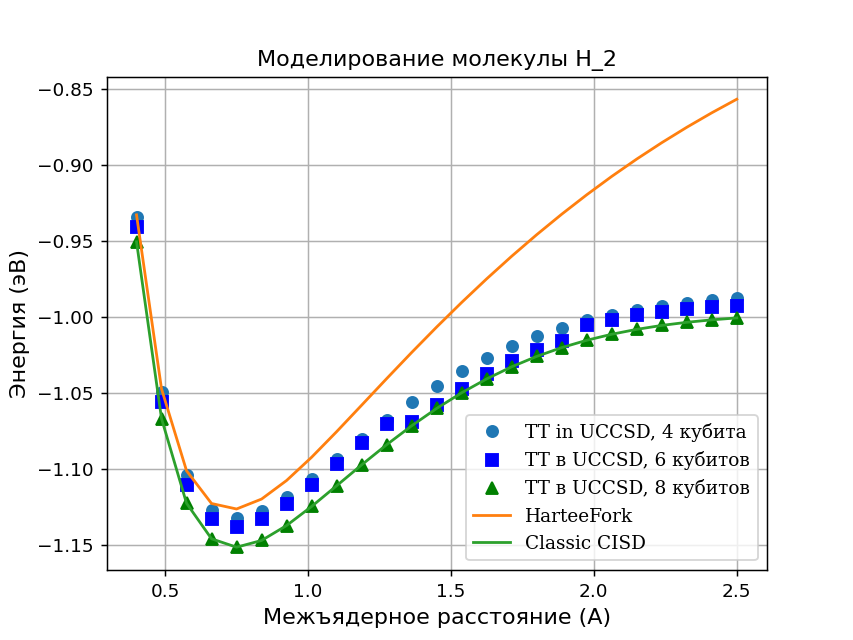

In [15]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
# for i in range(K):
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
f = 25
k = 0
font = {'family' : "serif",
        'weight' : "normal",
        'size'   : 10}

matplotlib.rc('font', **font)

ax.plot(R[k:f],GE4[k:f],'o',label="TT in UCCSD, 4 кубита")
ax.set_xlabel('Межъядерное расстояние (А)',fontsize = 12)
ax.set_ylabel('Энергия (эВ)',fontsize = 12)
ax.plot(R[k:f],GE6[k:f],'bs',label="TT в UCCSD, 6 кубитов")
ax.plot(R[k:f],GE8[k:f],'g^',label="TT в UCCSD, 8 кубитов")
ax.plot(R[k:f],E_HF[k:f],label="HarteeFork")
ax.yaxis.get_label()
ax.xaxis.get_label()
ax.grid()
# ax.plot(R[k:f],E_HF[k:f], label="Hartree Fock (classic initial energy)")
ax.plot(R[k:f],E_CISD[k:f], label="Classic CCSD")
ax.legend()
ax.set_title(label = "Mоделирование молекулы H_2")
# plt.savefig("figureH2.png")

In [4]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
from qiskit_nature.second_q.mappers import QubitConverter
from qiskit_nature.second_q.circuit.library import HartreeFock, UCC
import pyscf
from Ternary_Tree import *
import itertools

at_name = 'Li'
bond_length = 1
basis = 'sto-3g'
nmodes = 4

from Ternary_Tree import jwenergy, ttenergy, energy_classic
import numpy as np
N =17
K = 20
k=0
GE = [[] for _ in range(K)]
for k in range(K):
    GE[k] = [[] for _ in range(N)] 
GE4 = [0]*N
GE6 = [0]*N
GE8 = [0]*N
IE = [0]*N
# JWE = [0]*N
R = np.linspace(1.1, 1.9, N)
E_CISD = [0]*N
E_HF = [0]*N  
def energy_classic(bond_length, at_name, nmodes = None, basis = "6-31G"):

    mol = pyscf.M(
        atom = "H 0 0 0;" + at_name + " 0 0 " + str(bond_length),
        basis = basis)
    mf = mol.HF().run()
    mycc = pyscf.cc.CCSD(mf, frozen=[3,4]).run()

    return mycc.e_tot, mf.e_tot
for n in range(0,N):

    print(n)
#                     GE[k][n], IE[n] = ttenergy(R[n],"H", nmodes = 6,basis = "6-31G",only_hartree = True,ins = [i1,i2,i3,i4])

#     GE4[n],IE[n] = ttenergy_opt4(R[n],"Li", nmodes = 6,basis = "6-31G",only_hartree = False)

    GE6[n],IE[n] = ttenergy_opt4(R[n],"Li", nmodes = 6,basis = "STO-3G",only_hartree = False, active_orbitals = [0,1,5])
# 
    GE8[n],IE[n] = ttenergy_opt4(R[n],"Li", nmodes = 8,basis = "STO-3G",only_hartree = False, active_orbitals = [0,1,2,5])


#     JWE[n]= jwenergy(R[n])
    E_CISD[n], E_HF[n] = energy_classic(R[n],"Li", basis = "STO-3G")

0
converged SCF energy = -7.80874317649341
E(CCSD) = -7.823810821952157  E_corr = -0.01506764545874687
1
converged SCF energy = -7.82371099003546
E(CCSD) = -7.838818592326888  E_corr = -0.01510760229143205
2
converged SCF energy = -7.83561582555692
E(CCSD) = -7.850842872931842  E_corr = -0.01522704737491554
3
converged SCF energy = -7.84490531557397
E(CCSD) = -7.86033508353314  E_corr = -0.01542976795916996
4
converged SCF energy = -7.85195385795623
E(CCSD) = -7.86767195369801  E_corr = -0.01571809574177621
5
converged SCF energy = -7.85707622369948
E(CCSD) = -7.873169659694438  E_corr = -0.01609343599495509
6
converged SCF energy = -7.8605386610207
E(CCSD) = -7.877095331039256  E_corr = -0.01655667001855694
7
converged SCF energy = -7.86256778554219
E(CCSD) = -7.879676236842848  E_corr = -0.01710845130065728
8
converged SCF energy = -7.86335762153511
E(CCSD) = -7.881107059864857  E_corr = -0.01774943832974246
9
converged SCF energy = -7.86307516130409
E(CCSD) = -7.881555648422591  E_c

<IPython.core.display.Javascript object>


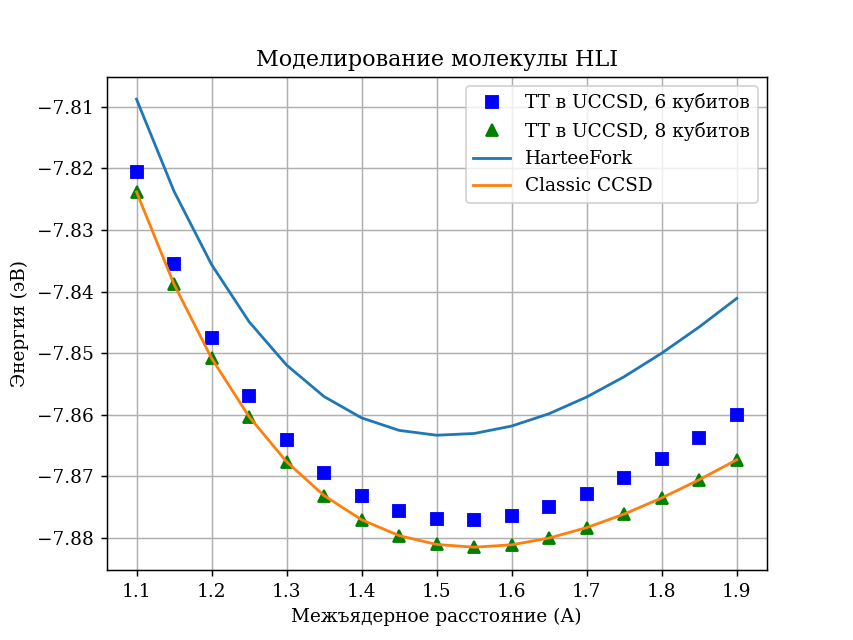

In [5]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
# for i in range(K):
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
f = 25
k = 0
font = {'family' : "serif",
        'weight' : "normal",
        'size'   : 10}

matplotlib.rc('font', **font)

# ax.plot(R[k:f],GE4[k:f],'o',label="TT in UCCSD, 4 кубита")
ax.set_xlabel('Межъядерное расстояние (А)')
ax.set_ylabel('Энергия (эВ)')
ax.plot(R[k:f],GE6[k:f],'bs',label="TT в UCCSD, 6 кубитов")
ax.plot(R[k:f],GE8[k:f],'g^',label="TT в UCCSD, 8 кубитов")
ax.plot(R[k:f],E_HF[k:f],label="HarteeFork")
ax.yaxis.get_label()
ax.xaxis.get_label()
ax.grid()
# ax.plot(R[k:f],E_HF[k:f], label="Hartree Fock (classic initial energy)")
ax.plot(R[k:f],E_CISD[k:f], label="Classic CCSD")
ax.legend()
ax.set_title(label = "Mоделирование молекулы HLI")
plt.savefig("figureHLi4.png")